# Baryon Acoustic Oscillation Cosmology

Here we want to produce a few plots for the BAO part in the thesis.

The BAO feature in the Large Scale Structure (LSS) correlation function is the remnant of the acoustic waves propagating in the baryon photon plasma prior to recombination. After baryons and photons decouple we expect a characteristic length to be imprinted in the matter correlation function. This length is the sound horizon and it is given by
$$
r_s = \int_{z_{\rm drag}}^{\infty} \frac{c_s(z) dz}{H(z)}
$$
This scale is then stretched by the Hubble expansion and is measured as a feature in the LSS correlation space. The measurements are usually expressed in terms of the following quantities
$$
\Delta z = H(z) r_s, \\
\Delta \theta = \frac{r_s}{D_A(z) (1+z)},
$$

Let's start by importing a few libraries

In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import pylab as pil

In [2]:
# this is the flat LCDM version of the Hubble parameter
def Hubble2(z, omm, omg, omnu, omde, H0):
    H2 = H0**2 * (omm*(1.0+z)**3 + omde + (omg+omnu)*(1.0+z)**4)
    return H2

In [3]:
def baryPhotRatio(z,omb, omr):
    R = 3.0*omb/4.0/omr/(1.0+z)
    return R

In [4]:
def soundSpeed(z, omb, omg):
    R = baryPhotRatio(z,omb, omg)
    cs = 1.0/np.sqrt(3*(1.0+R))
    return cs

In [5]:
def sound_horizon_integrand(z, omm, omb, omg, omnu, omde, H0):
    integrand = soundSpeed(z, omb, omg)/np.sqrt(Hubble2(z, omm, omg, omnu, omde, H0))
    return integrand

In [6]:
def soundHorizon(zdrag, omm, omb,  omg, omnu, omde, H0):
    high_z = 1.0e8
    integral = integrate.quad(sound_horizon_integrand, zdrag, high_z, args=(omm, omb, omg, omnu, omde, H0))[0]
    rs = integral*3.0e5
    
    return rs

define the angular-diameter distance

$$
D_A(z) = \frac{\chi(z)}{1+z}
$$

In [7]:
def comoving_integrand(z, omm, omg, omnu, omde, H0):
    integrand = 1.0/np.sqrt(Hubble2(z, omm, omg, omnu, omde, H0))
    return integrand

In [8]:
def AngularDiameterDistance(z, omm, omg, omnu, omde, H0):
    integral = integrate.quad(comoving_integrand, 0, z, args=(omm, omg, omnu, omde, H0))[0]
    dA = integral*3.0e5 / (1.0+z)
    return dA

add the fitting function for zdrag from https://arxiv.org/pdf/astro-ph/9709112.pdf

In [25]:
def zDrag(omm, H0):
    h = H0/100
    h2 = h*h
    b1 = 0.313*(omm*h2)**(-0.419)*(1.0 + 0.607*(omm*h2)**(0.674))
    b2 = 0.238*(omm*h2)**0.223
    zdrag = 1291*(omm*h2)**0.251*(1.0+b1*(omb*h2)**b2)/(1.0+ 0.659*(omm*h2)**0.828)
    return zdrag
    

In [26]:
#omm  = 0.3089
#omde = 0.6911
omm = 0.316
H0 = 67.26
# omega baryons from Planck 2015 results
omb = 0.04868312694

# photons and neutrinos
omg = 1.4952e-13*(2.7255**4)/(3*(H0/3.0e5)**2)
omnu = 3*(7.0/8.0)*(4.0/11)**(4.0/3)*omg
omde = 1.0-omg-omnu-omm

zdrag = zDrag(omm, H0)

In [27]:
zdrag

1019.9417611112558

In [28]:
omg

5.471313027833493e-05

In [29]:
omde

0.6839080096129466

We have that the sound horizon is about 150 ```Mpc```

In [30]:
rs = soundHorizon(zdrag=zdrag, omm=omm, omb=omb, omg=omg, omnu=omnu, omde=omde, H0=H0)
rs

151.21150293085338

Let's normalize the sound horizon, using the following $r_s$

In [151]:
1./.6766815537e-2

147.77999999144944

In [31]:
rs_norm = rs*.6766815537e-2

let's do some plots!! For SDSS BOSS DR 12 there are two types of measurements: $D_M(z)/r_s$ and $H(z) r_s$.
Let's create the theoretical predictions.

In [98]:
z = np.linspace(0,3,100)
DM_over_rs = []
DV_over_rs = []
Hz_rs=[]
for zthis in z:
    Hz_rs.append(np.sqrt(Hubble2(zthis, omm, omg, omnu, omde, H0))*rs_norm)
    DM_over_rs.append((1.0+zthis)*AngularDiameterDistance(zthis, omm, omg, omnu, omde, H0)/rs_norm)
    DV_over_rs.append((((1.0+zthis)*AngularDiameterDistance(zthis, omm, omg, omnu, omde, H0))**2 *
                      zthis /np.sqrt(Hubble2(zthis, omm, omg, omnu, omde, H0))*3.0e5)**(1.0/3.0))
    

So the BAO probes the Hubble parameter at different redshifts $H(z)$

From the paper of DR 12 consesus get the data: https://arxiv.org/pdf/1607.03155.pdf table 7

In [99]:
DR12z = np.array([0.38, 0.51, 0.61])
HzrsDR12 = np.array([81.2087  , 90.9029,  98.9647])
dHzrsDR12 = np.array([3.2 ,  3.2 , 3.4 ])
DMorsDR12 = np.array([1512, 1975 , 2307 ])
dDMorsDR12 = np.array([33, 41, 50])

adding data from the Ly$\alpha$ BAO: see this paper https://arxiv.org/abs/1311.1767


In [100]:
lyaz = 2.36
Hzrslya = 226
dHzrslya = 8 
DMorslya = 1590*(1.0+ 2.36) 
dDMorslya = 60*(1.0+ 2.36) 


In [116]:
DVorsDR12 = np.power([np.power(DMorsDR12,2)*DR12z*3.0e5/ HzrsDR12],(1./3.))
dDVorsDR12 = np.power(DVorsDR12,-2)*(((2*DMorsDR12*DR12z*3.0e5/HzrsDR12))*dDMorsDR12 + np.power(DMorsDR12,2)*DR12z*3.0e5*np.power(HzrsDR12,-2)*dHzrsDR12)/3

In [131]:
DVorsDR12.shape

(1, 3)

In [118]:
DVorslya =(DMorslya**2*lyaz*3.0e5/ Hzrslya)**(1./3.)
dDVorslya = DVorslya**(-2)*((2*DMorslya*lyaz*3.0e5/Hzrslya)*dDMorslya + (DMorslya**2*lyaz*3.0e5/Hzrslya**(2))*dHzrslya)/3

In [119]:
DVorslya

4471.630132117991

In [120]:
dDVorslya

165.25643723083155

Other measurements from quasars: see this paper https://arxiv.org/pdf/1705.06373.pdf


In [121]:
zqua = 1.52
DVorsqua=3843 
dDVorsqua=147

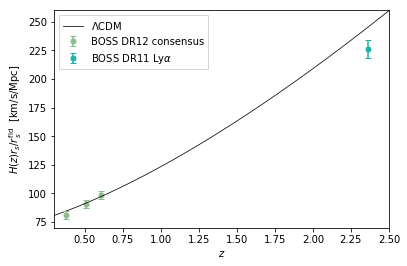

In [142]:
plt.plot(z, Hz_rs, color = 'black', linewidth = 0.75, label = r'$\Lambda$CDM')
plt.errorbar(DR12z, HzrsDR12, yerr=dHzrsDR12, linestyle = '', marker = 'o', 
             color = 'darkseagreen', label = 'BOSS DR12 consensus', barsabove = True, capsize =3, ms = 5 )
plt.errorbar(lyaz, Hzrslya, yerr=dHzrslya, linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'BOSS DR11 Ly$\alpha$', barsabove = True, capsize =3, ms = 5 )
plt.xlabel(r'$z$')
plt.legend(loc = 'upper left', fancybox = False)
plt.ylabel(r'$H(z) r_s / r_s^{\rm fid}$  [km/s/Mpc]')
plt.xlim(0.3,2.5)
plt.ylim(70,260)
pil.savefig('./plots/BAOHz.pdf', bbox_inches='tight')
plt.show()

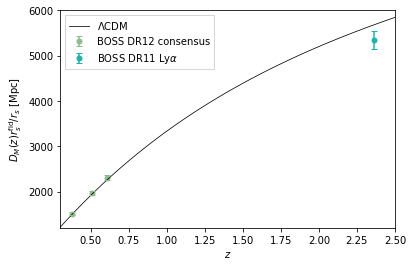

In [143]:
plt.plot(z, DM_over_rs, color = 'black', linewidth = 0.75, label = r'$\Lambda$CDM')
plt.errorbar(DR12z, DMorsDR12, yerr=dDMorsDR12, linestyle = '', marker = 'o', 
             color = 'darkseagreen', label = 'BOSS DR12 consensus', barsabove = True, capsize =3, ms = 5 )
plt.errorbar(lyaz, DMorslya, yerr=dDMorslya, linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'BOSS DR11 Ly$\alpha$', barsabove = True, capsize =3, ms = 5 )
#plt.errorbar(zqua, DMorsqua, yerr=dDMorsqua, linestyle = '', marker = 'o', 
             #color = 'plum', label = r'quasar$', barsabove = True, capsize =3, ms = 5 )



plt.xlabel(r'$z$')
plt.legend(loc = 'upper left', fancybox = False)
plt.ylabel(r'$D_M(z) r_s^{\rm fid}/r_s$ [Mpc]')
plt.xlim(0.3,2.5)
plt.ylim(1200,6000)
pil.savefig('./plots/BAODMors.pdf')
plt.show()

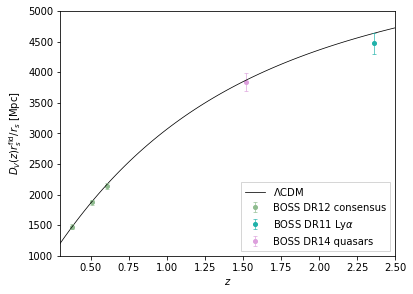

In [149]:
fig = plt.figure(figsize=(6,4.5))
plt.plot(z, DV_over_rs, color = 'black', linewidth = 0.75, label = r'$\Lambda$CDM')
plt.errorbar(DR12z, DVorsDR12[0,:], yerr=dDVorsDR12[0,:], linestyle = '', marker = 'o', 
             color = 'darkseagreen', label = 'BOSS DR12 consensus', barsabove = True, capsize =2, ms = 4,
            capthick = 0.65, linewidth = 0.65)
plt.errorbar(lyaz, DVorslya, yerr=dDVorslya, linestyle = '', marker = 'o', 
             color = 'lightseagreen', label = r'BOSS DR11 Ly$\alpha$', barsabove = True,
             capsize =2, ms = 4, capthick = 0.65, linewidth = 0.65 )
plt.errorbar(zqua, DVorsqua, yerr=dDVorsqua, linestyle = '', marker = 'o', 
             color = 'plum', label = r'BOSS DR14 quasars', barsabove = True, capsize =2, ms = 4,
            capthick = 0.65, linewidth = 0.65)



plt.xlabel(r'$z$')
plt.legend(loc = 'lower right', fancybox = False)
plt.ylabel(r'$D_V(z) r_s^{\rm fid}/r_s$ [Mpc]')
plt.xlim(0.3,2.5)
plt.ylim(1000,5000)
pil.savefig('./plots/BAODVors.pdf')
plt.show()